## Environment setup

In [1]:
!pip install roboflow

from roboflow import Roboflow
import cv2
import os
import locale
locale.getpreferredencoding = lambda: "UTF-8"
from IPython.display import Image
import numpy as np
import torchvision.transforms as transforms
from PIL import Image, ImageOps
import cv2
import colorsys
import random

### Configure your API keys

To fine-tune YOLOv12, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [2]:
import os

In [ ]:
os.environ["ROBOFLOW_API_KEY"] = "ROBOFLOW_API_KEY"

### Check GPU availability

**NOTE:** **YOLOv12 leverages FlashAttention to speed up attention-based computations, but this feature requires an Nvidia GPU built on the Ampere architecture or newer—for example, GPUs like the RTX 3090, RTX 3080, or even the Nvidia L4 meet this requirement.**

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [4]:
!nvidia-smi

Thu Mar  6 14:17:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4050 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   56C    P4              6W /   31W |      25MiB /   6141MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [5]:
!pip install git+https://github.com/sunsmarterjie/yolov12.git
!pip install roboflow
!pip install supervision
!pip install flash-attn --no-cache-dir


  Cloning https://github.com/sunsmarterjie/yolov12.git to c:\users\manus\appdata\local\temp\pip-req-build-h8tgb4hv
  Resolved https://github.com/sunsmarterjie/yolov12.git to commit 3a336a4adf3683d280e1a50d03fa24bbe7f24a5b
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/sunsmarterjie/yolov12.git 'C:\Users\Manus\AppData\Local\Temp\pip-req-build-h8tgb4hv'


     ---------------------------------------- 0.0/6.0 MB ? eta -:--:--
     ---------------------------------------- 6.0/6.0 MB 90.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      
      
      torch.__version__  = 2.5.1
      
      
      C:\Users\Manus\AppData\Local\Temp\pip-install-_ew4olio\flash-attn_84beddadf2294253bbb7d9114e5d99ec\setup.py:106: UserWarning: flash_attn was requested, but nvcc was not found.  Are you sure your environment has nvcc available?  If you're installing within a container from https://hub.docker.com/r/pytorch/pytorch, only images whose names contain 'devel' will provide nvcc.
        warnings.warn(
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Manus\AppData\Local\Temp\pip-install-_ew4olio\flash-attn_84beddadf2294253bbb7d9114e5d99ec\setup.py", line 198, in <module>
          CUDAExtension(
        File "c:\Users\Manus\anaconda3\Lib\site-packages\torch\utils\cpp_exten

In [6]:
!pip install flash-attn --no-build-isolation --no-cache-dir


     ---------------------------------------- 0.0/6.0 MB ? eta -:--:--
     ------- -------------------------------- 1.0/6.0 MB 6.3 MB/s eta 0:00:01
     ----------------- ---------------------- 2.6/6.0 MB 7.2 MB/s eta 0:00:01
     ----------------------------- ---------- 4.5/6.0 MB 7.7 MB/s eta 0:00:01
     ---------------------------------------- 6.0/6.0 MB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      
      
      torch.__version__  = 2.5.1
      
      
      C:\Users\Manus\AppData\Local\Temp\pip-install-95_tuu6e\flash-attn_2821783e13dc428fb0f4f70873b9fde0\setup.py:106: UserWarning: flash_attn was requested, but nvcc was not found.  Are you sure your environment has nvcc available?  If you're installing within a container from https://hub.docker.com/r/pytorch/pytorch, only images whose names contain 'devel' will provide nvcc.
        warnings.warn(
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\Manus\AppData\Local\Temp\pip-install-95_tuu6e\flash-attn_2821783e13dc428fb0f4f70873b9fde0\setup.py", line 198, in <module>
          CUDAExtension(
        File "c:\Users\Manus\anaconda3\Lib\site-packages\torch\utils\cpp_exten

In [37]:
pip install huggingface_hub


Note: you may need to restart the kernel to use updated packages.


In [38]:
import cv2
from ultralytics import YOLO
import supervision as sv

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\Manus\AppData\Roaming\yolov12\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


In [22]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Manus\\AppData\\Local\\Temp\\pip-install-0wpoqvg8\\flash-attn_208bdeab0d3b4c21b542c9db001ebbc0\\csrc\\composable_kernel\\library\\include\\ck\\library\\tensor_operation_instance\\gpu\\grouped_conv_bwd_weight\\device_grouped_conv_bwd_weight_two_stage_xdl_instance.hpp'



In [21]:
HOME = os.getcwd()
print(HOME)

c:\Manus\deep_learning\project\train


### Install dependencies

**NOTE:** Currently, YOLOv12 does not have its own PyPI package, so we install it directly from GitHub while also adding roboflow (to conveniently pull datasets from the Roboflow Universe), supervision (to visualize inference results and benchmark the model’s performance), and flash-attn (to accelerate attention-based computations via optimized CUDA kernels).

In [ ]:
+pip install git+https://github.com/sunsmarterjie/yolov12.git
pip install roboflow
pip install supervision
pip install flash-attn --no-cache-dir

SyntaxError: invalid syntax (2565999571.py, line 1)

In [13]:
python --version


NameError: name 'python' is not defined

In [11]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision flash-attn

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Manus\\AppData\\Local\\Temp\\pip-install-prjwp9wt\\flash-attn_144808faecef47f0b0c07972b03a64df\\csrc\\composable_kernel\\library\\include\\ck\\library\\tensor_operation_instance\\gpu\\grouped_conv_bwd_weight\\device_grouped_conv_bwd_weight_two_stage_xdl_instance.hpp'



In [ ]:
from ultralytics import YOLO
import supervision as sv

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


## Run inference

In the example, we're using the `yolov12l.pt` model, but you can experiment with different model sizes by simply swapping out the model name during initialization. Options include `yolov12n.pt`, `yolov12s.pt`, `yolov12m.pt`, `yolov12l.pt`, and `yolov12x.pt`.

In [ ]:
# dataset_location = r"c:\Manus\deep_learning\project\dataset_plates"

In [ ]:
# Define the file path
file_path = f"{dataset_location}\data.yaml"

# Open the file to read the lines
with open(file_path, "r") as f:
    lines = f.readlines()

# Remove the last four lines
lines = lines[:-4]

# Append the new lines
lines.append("test: ../test/images\n")
lines.append("train: ../train/images\n")
lines.append("val: ../valid/images\n")

# Write the updated content back to the file
with open(file_path, "w") as f:
    f.writelines(lines)

print("File updated successfully!")


File updated successfully!


In [33]:
import os
print(os.getcwd())

c:\Manus\deep_learning\project\train


In [ ]:
with open(r"file_path", "r") as f:
    print(f.read())


train: ../train/images
val: ../valid/images
test: ../test/images

nc: 1
names: ['plates']

roboflow:
  workspace: projectdl-cjfj5
test: ../test/images
train: ../train/images
val: ../valid/images



## Fine-tune YOLOv12 model

We are now ready to fine-tune our YOLOv12 model. In the code below, we initialize the model using a starting checkpoint—here, we use `yolov12s.yaml`, but you can replace it with any other model (e.g., `yolov12n.pt`, `yolov12m.pt`, `yolov12l.pt`, or `yolov12x.pt`) based on your preference. We set the training to run for 100 epochs in this example; however, you should adjust the number of epochs along with other hyperparameters such as batch size, image size, and augmentation settings (scale, mosaic, mixup, and copy-paste) based on your hardware capabilities and dataset size.

**Note:** **Note that after training, you might encounter a `TypeError: argument of type 'PosixPath' is not iterable error` — this is a known issue, but your model weights will still be saved, so you can safely proceed to running inference.**

In [42]:
from ultralytics import YOLO

model = YOLO('yolov12m.yaml')

results = model.train(data=f'{dataset_location}/data.yaml', epochs=300,imgsz=640)

New https://pypi.org/project/ultralytics/8.3.84 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.63  Python-3.12.7 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov12m.yaml, data=c:\Manus\deep_learning\project\train\dataset_plates/data.yaml, epochs=300, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, r

100%|██████████| 755k/755k [00:00<00:00, 34.3MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2689536  ultralytics.nn.modules.block.A2C2f           [512, 512, 2, True, 4]        
  7                  -1  1   2360320  ultralytics

 15                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 16            [-1, 11]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 17                  -1  1   1183232  ultralytics.nn.modules.block.A2C2f           [768, 512, 1, False, -1]      
 18                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
 19             [-1, 8]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 20                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 21        [14, 17, 20]  1   1411795  ultralytics.nn.modules.head.Detect           [1, [256, 512, 512]]          
YOLOv12m summary: 501 layers, 20,138,259 parameters, 20,138,243 gradients, 67.7 GFLOPs

Freezing layer 'model.21.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.34M/5.34M [00:00<00:00, 66.9MB/s]


AMP: checks passed 


train: Scanning C:\Manus\deep_learning\project\train\dataset_plates\train\labels... 171 images, 6 backgrounds, 0 corrupt: 100%|██████████| 171/171 [00:00<00:00, 415.95it/s]


train: New cache created: C:\Manus\deep_learning\project\train\dataset_plates\train\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 339, len(boxes) = 1431. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Scanning C:\Manus\deep_learning\project\train\dataset_plates\valid\labels... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<00:00, 140.48it/s]

val: New cache created: C:\Manus\deep_learning\project\train\dataset_plates\valid\labels.cache
WARNING  Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 124. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 123 weight(decay=0.0), 130 weight(decay=0.0005), 129 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/11 [00:00<?, ?it/s]UserWarning: Memory Efficient attention defaults to a non-deterministic algorithm. To explicitly enable determinism call torch.use_deterministic_algorithms(True, warn_only=False). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\attention_backward.cu:657.)
      1/300      9.11G      6.311      4.907      4.449        167        640: 100%|██████████| 11/11 [01:26<00:00,  7.83s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.82it/s]

                   all         13        124          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/11 [00:07<?, ?it/s]


KeyboardInterrupt: 

## Evaluate fine-tuned YOLOv12 model

In [ ]:
!ls {HOME}/runs/detect/train/

confusion_matrix.png  result.png  weights


In [ ]:
from IPython.display import Image

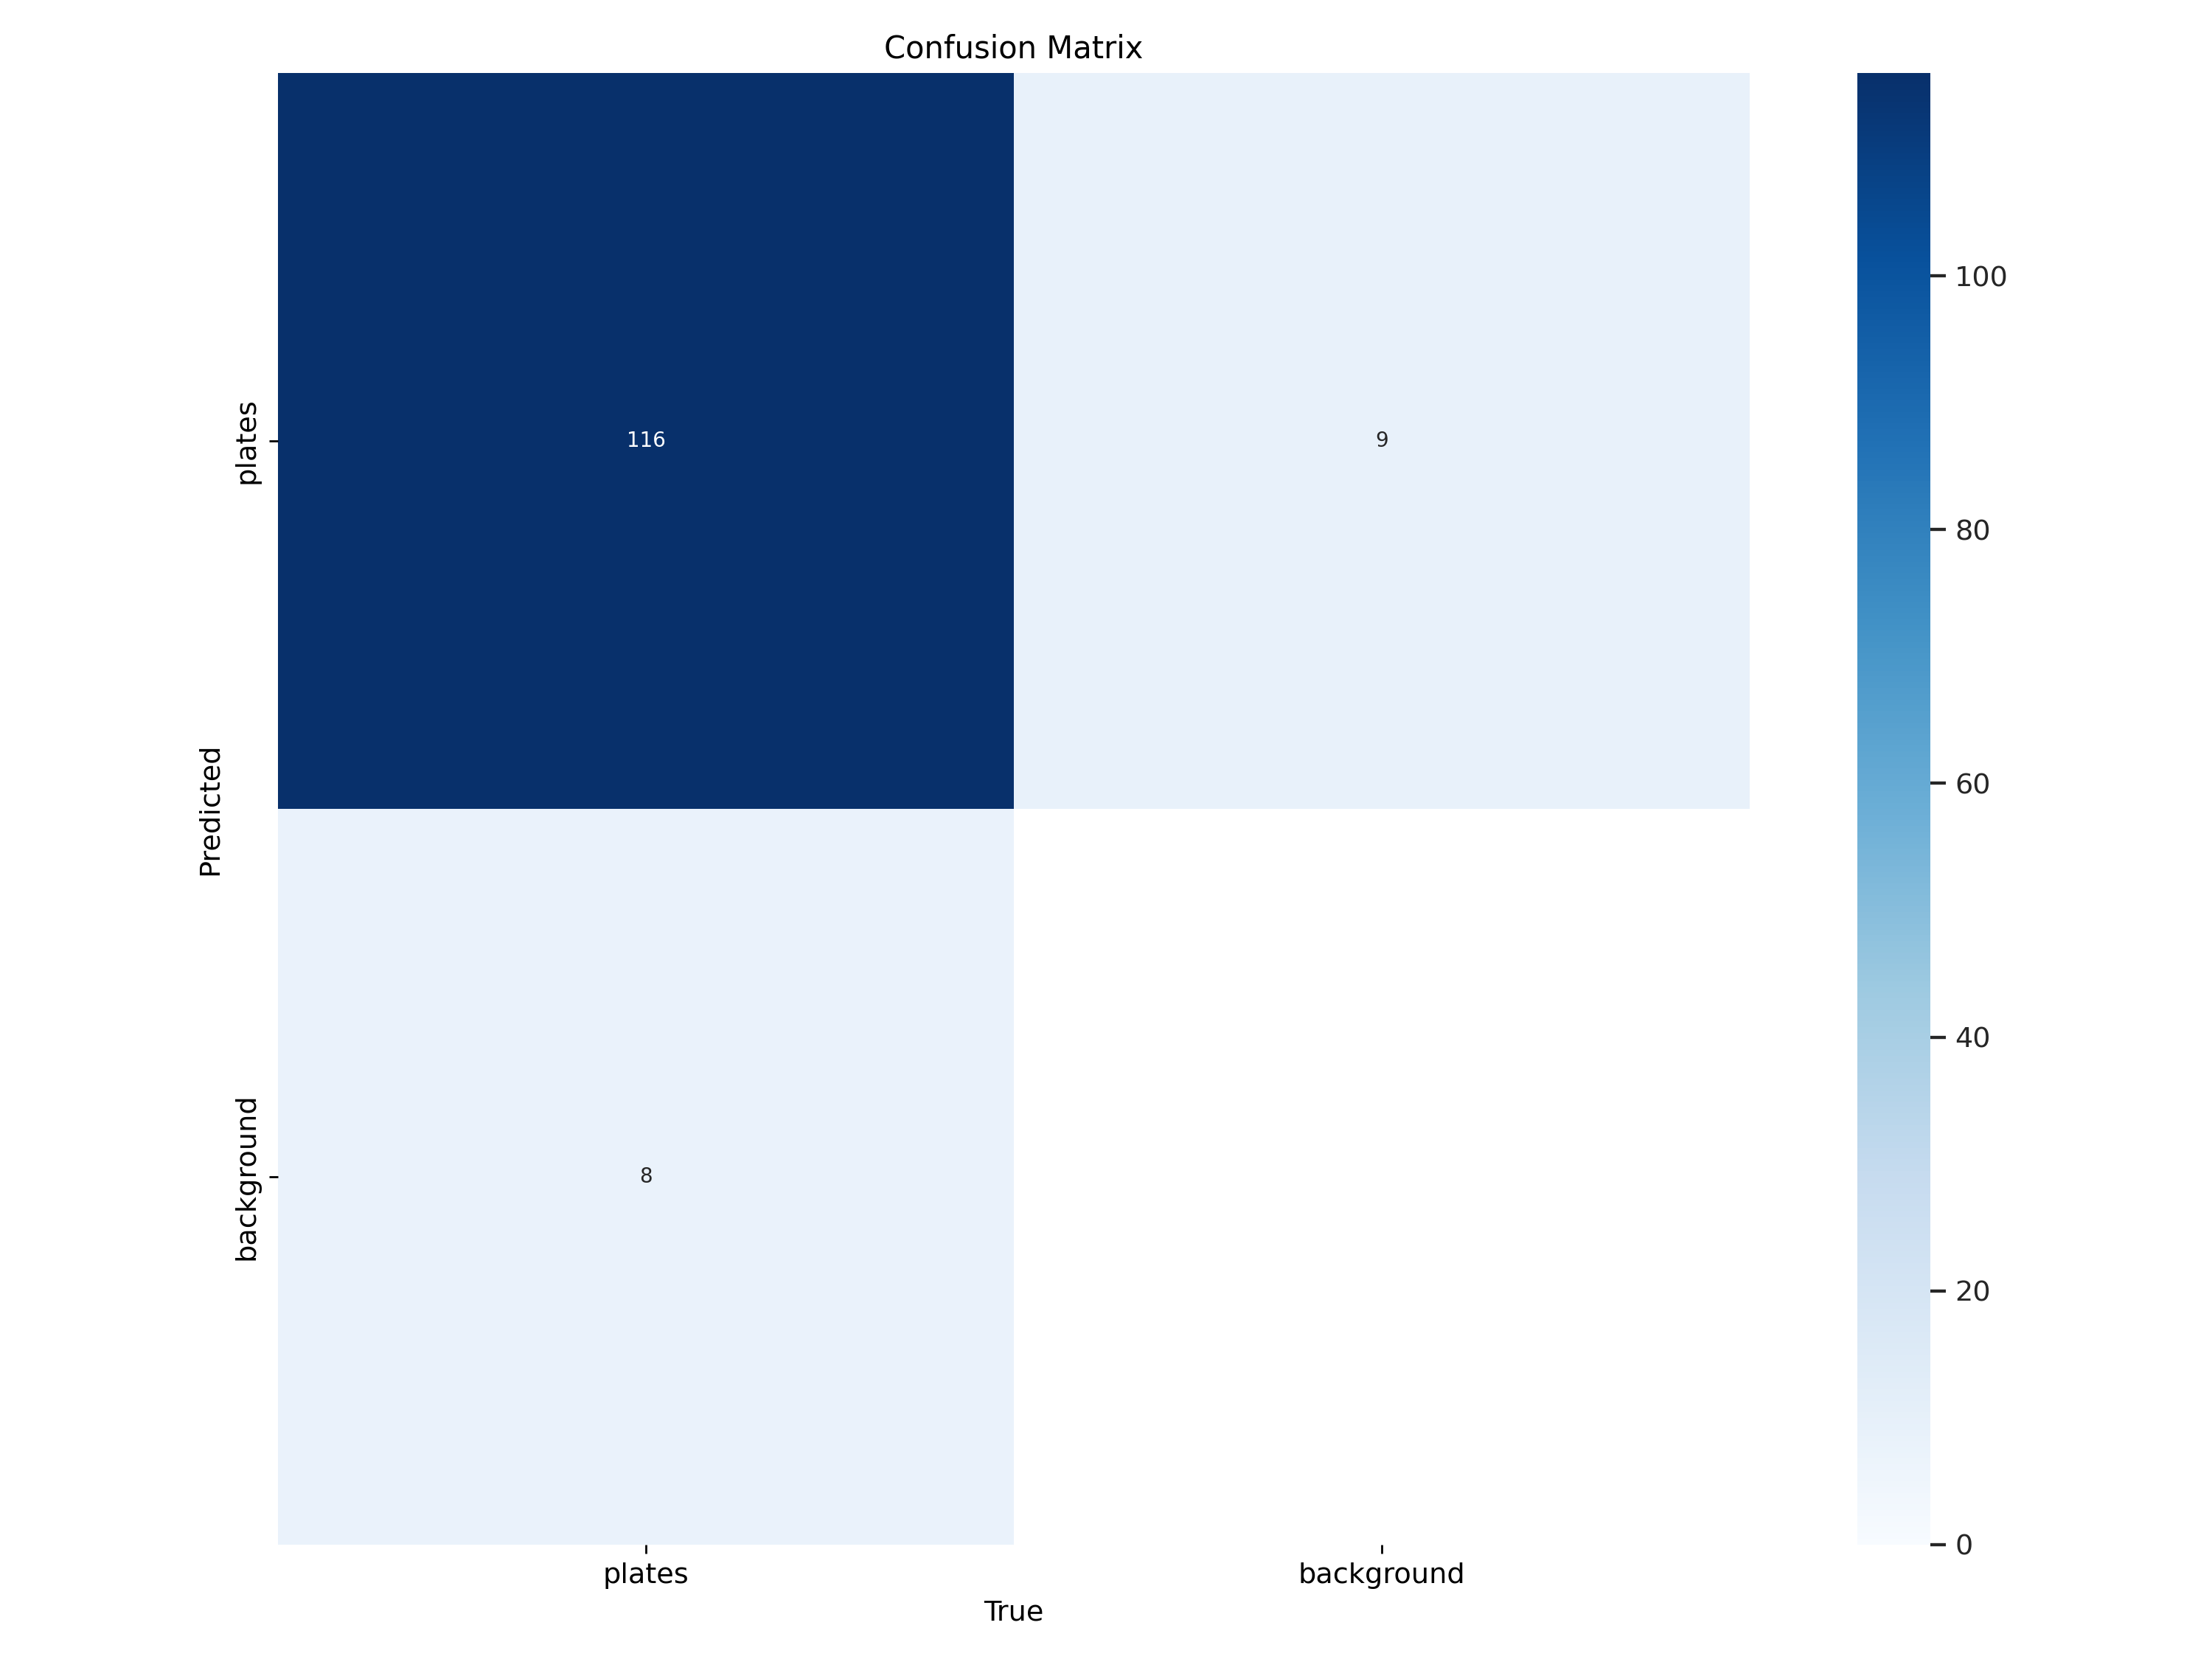

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=1000)

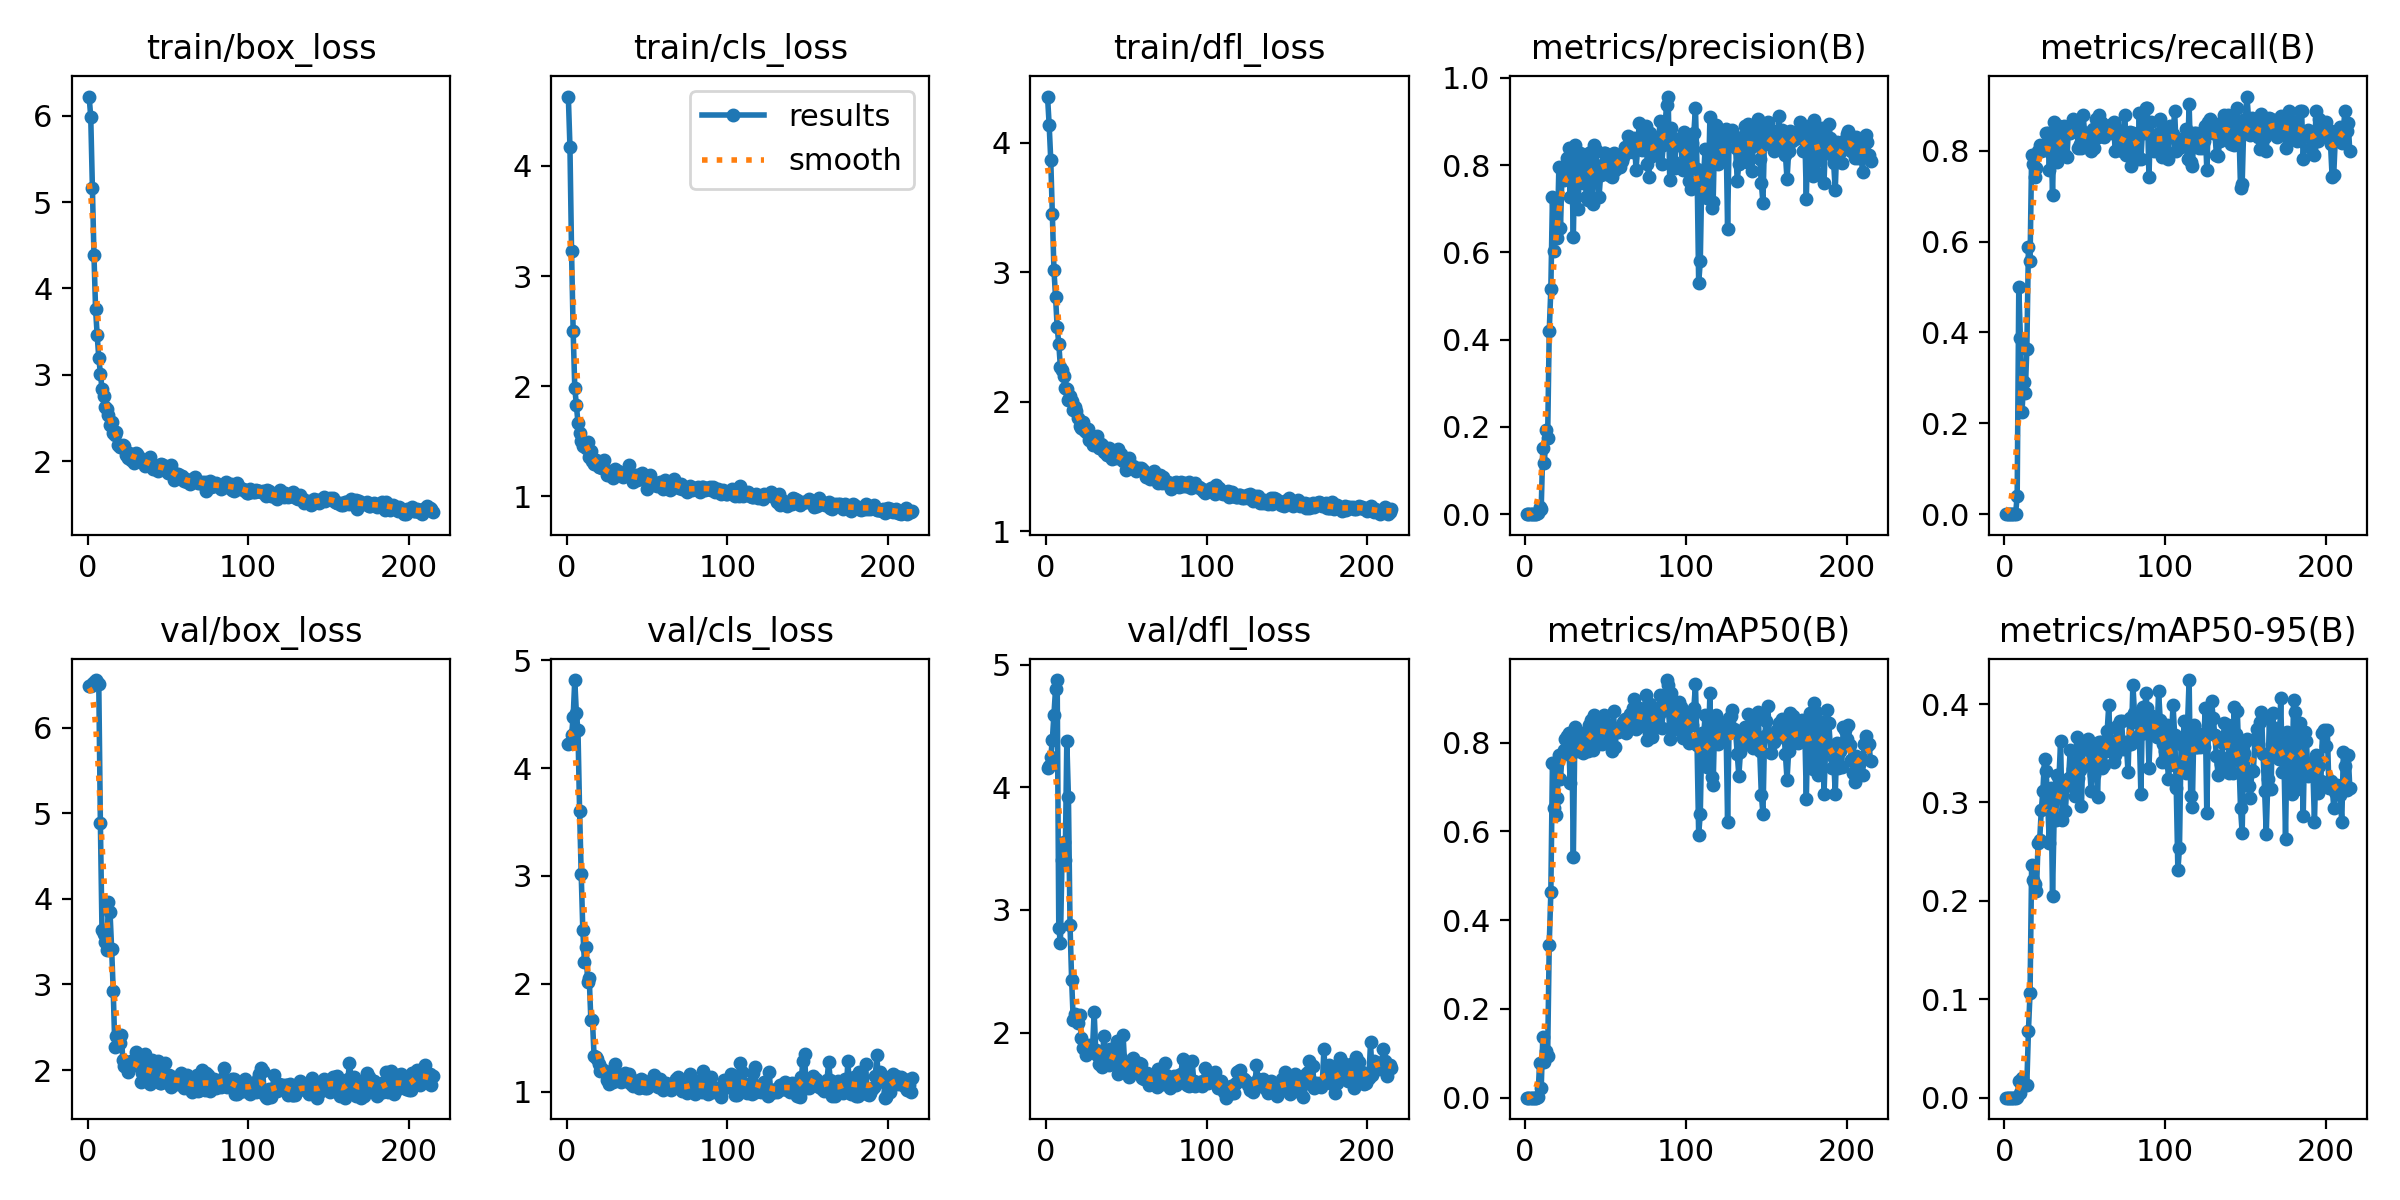

In [ ]:
Image(filename=f'{HOME}/runs/detect/train/result.png', width=1000)

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

ds.classes

['plates']

In [ ]:
from supervision.metrics import MeanAveragePrecision

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

In [ ]:
print("mAP 50:95", map.map50_95)
print("mAP 50", map.map50)
print("mAP 75", map.map75)

mAP 50:95 0.2801965595638177
mAP 50 0.7868214752939631
mAP 75 0.16901427482420955


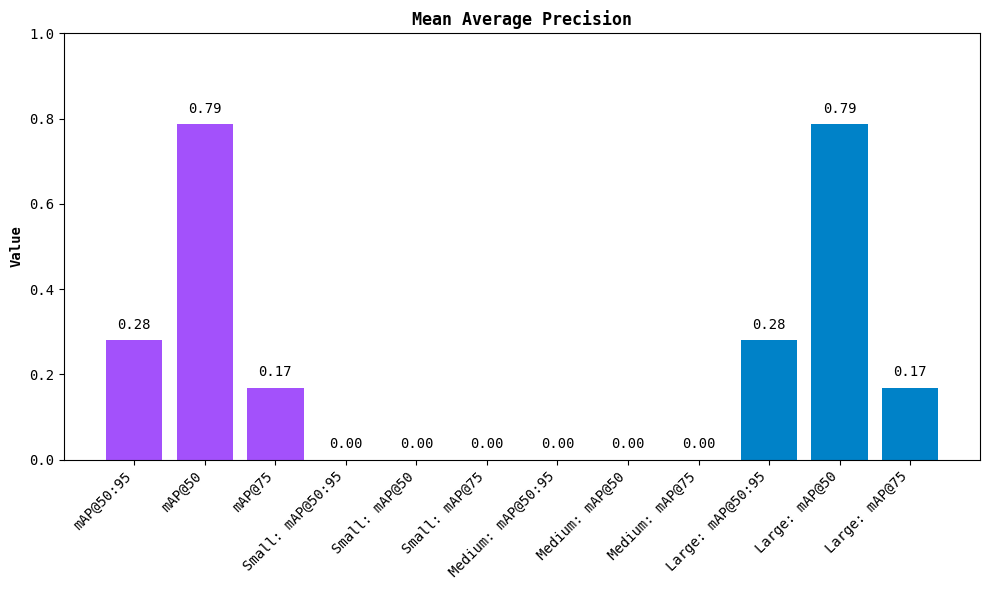

In [ ]:
map.plot()

## Run inference with fine-tuned YOLOv12 model

In [ ]:
model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

In [ ]:
def histogram_equalization(image):
    """
    ทำ Histogram Equalization บนช่อง Value (V) ของภาพ HSV
    """
    # แปลงจาก RGB เป็น HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # แยกช่อง Hue, Saturation, Value
    h, s, v = cv2.split(hsv)

    # ทำ Histogram Equalization บนช่อง V (ความสว่าง)
    v_eq = cv2.equalizeHist(v)

    # รวมกลับเป็น HSV
    hsv_eq = cv2.merge([h, s, v_eq])
    # แปลงกลับเป็น RGB
    image_eq = cv2.cvtColor(hsv_eq, cv2.COLOR_HSV2RGB)

    return image_eq

def white_balance_simple(image):
    """
    Simple white balance by scaling channels based on average intensity
    """
    # Convert to float for calculations
    image_float = image.astype(np.float32)

    # Calculate the mean for each channel
    mean_r = np.mean(image_float[:,:,0])
    mean_g = np.mean(image_float[:,:,1])
    mean_b = np.mean(image_float[:,:,2])

    # Calculate scaling factors
    scale_r = 128 / mean_r if mean_r > 0 else 1
    scale_g = 128 / mean_g if mean_g > 0 else 1
    scale_b = 128 / mean_b if mean_b > 0 else 1

    # Scale each channel
    image_float[:,:,0] *= scale_r
    image_float[:,:,1] *= scale_g
    image_float[:,:,2] *= scale_b

    # Clip values to valid range
    image_balanced = np.clip(image_float, 0, 255).astype(np.uint8)

    return image_balanced

def white_balance_gray_world(image):
    """
    Gray World Assumption white balance method
    """
    # Convert to float for calculations
    image_float = image.astype(np.float32)

    # Calculate average of each channel
    r_avg = np.mean(image_float[:,:,0])
    g_avg = np.mean(image_float[:,:,1])
    b_avg = np.mean(image_float[:,:,2])

    # Calculate the overall average
    avg = (r_avg + g_avg + b_avg) / 3

    # Calculate scaling factors
    r_scale = avg / r_avg if r_avg > 0 else 1
    g_scale = avg / g_avg if g_avg > 0 else 1
    b_scale = avg / b_avg if b_avg > 0 else 1

    # Apply scaling
    image_float[:,:,0] *= r_scale
    image_float[:,:,1] *= g_scale
    image_float[:,:,2] *= b_scale

    # Clip values to valid range
    image_balanced = np.clip(image_float, 0, 255).astype(np.uint8)
    return image_balanced

In [ ]:
def detect_color_from_bbox(image, bbox, crop_ratio=0.8):
    """
    Detect average color from bounding box using advanced color analysis

    Args:
    - image: PIL Image
    - bbox: (xmin, ymin, xmax, ymax)
    - crop_ratio: Ratio of bounding box to analyze (default 0.8)

    Returns:
    - Tuple of (hue, saturation, value)
    """
    xmin, ymin, xmax, ymax = bbox
    cropped_img = image.crop((xmin, ymin, xmax, ymax))
    cropped_img = np.array(cropped_img)

    # Convert to HSV
    hsv_img = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2HSV)

    # Apply median blur to reduce noise
    hsv_img = cv2.medianBlur(hsv_img, 5)

    # Crop center of the image
    h, w, _ = hsv_img.shape
    new_h, new_w = int(h * crop_ratio), int(w * crop_ratio)
    y_offset, x_offset = (h - new_h) // 2, (w - new_w) // 2
    cropped_center = hsv_img[y_offset:y_offset+new_h, x_offset:x_offset+new_w]

    # Calculate median values
    avg_hue = np.median(cropped_center[:, :, 0])
    avg_sat = np.median(cropped_center[:, :, 1])
    avg_val = np.median(cropped_center[:, :, 2])

    return avg_hue, avg_sat, avg_val

def identify_color(avg_hue, avg_sat, avg_val):
    """
    Identify color based on HSV values

    Args:
    - avg_hue: Hue value (0-180 in OpenCV)
    - avg_sat: Saturation value (0-255)
    - avg_val: Value/Brightness value (0-255)

    Returns:
    - Color name as string
    """
    # Convert OpenCV HSV to standard HSV
    hue = avg_hue * 2  # OpenCV uses 0-180, standard HSV uses 0-360
    sat = avg_sat / 255 * 100  # Convert to percentage
    val = avg_val / 255 * 100  # Convert to percentage

    # Print debug information
    print(f"🔍 Hue: {hue:.2f}, Saturation: {sat:.2f}%, Value: {val:.2f}%")

    # Check for white, black, or gray conditions
    if val < 20:
        return "Black"
    if sat < 20 or val > 90:
        return "White"

    # Detailed color mapping
    if (hue >= 330 or hue <= 30):  # Red
        return "Red"
    elif 30 < hue < 90:  # Yellow to Green
        if hue < 60:
            return "Yellow"
        else:
            return "Green"
    elif 90 <= hue < 150:  # Cyan to Blue
        if hue < 120:
            return "Cyan"
        else:
            return "Blue"
    elif 150 <= hue < 270:  # Blue to Purple
        if hue < 210:
            return "Blue"
        else:
            return "Purple"
    elif 270 <= hue < 330:  # Magenta to Red
        return "Red2"

    return "Unknown"

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Main processing function
def process_image(image_path, model, sv):
    # Open and preprocess image
    image = Image.open(image_path)
    image = ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    # image = Image.fromarray(white_balance_gray_world(np.array(image)))

    # Detect objects
    results = model(image, verbose=False)[0]
    # ปรับค่า IoU threshold ในขั้นตอน NMS
    detections = sv.Detections.from_ultralytics(results).with_nms()


    # Annotate image
    box_annotator = sv.BoxAnnotator(thickness=5)
    label_annotator = sv.LabelAnnotator()
    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Count colors
    dict_count = {}
    for i, box in enumerate(detections.xyxy):
        avg_color = detect_color_from_bbox(image, box)
        color = identify_color(*avg_color)

        # Count colors
        dict_count[color] = dict_count.get(color, 0) + 1

    # Print results
    for key, value in dict_count.items():
        print(f"{key}: {value}")

    print(f"Number of detections: {len(detections.xyxy)}")
    print(f"Number of boxes drawn: {len(detections)}")

    # Plot image
    sv.plot_image(annotated_image)

    return dict_count, annotated_image

# Call the processing function

# result_count, result_image = process_image(image_path, model, sv)

🔍 Hue: 352.00, Saturation: 61.18%, Value: 50.20%
🔍 Hue: 348.00, Saturation: 50.20%, Value: 49.41%
🔍 Hue: 228.00, Saturation: 20.78%, Value: 33.73%
🔍 Hue: 354.00, Saturation: 82.75%, Value: 23.92%
🔍 Hue: 270.00, Saturation: 32.16%, Value: 24.71%
🔍 Hue: 354.00, Saturation: 89.80%, Value: 18.04%
🔍 Hue: 348.00, Saturation: 45.49%, Value: 22.75%
🔍 Hue: 352.00, Saturation: 83.14%, Value: 21.18%
🔍 Hue: 192.00, Saturation: 9.41%, Value: 34.90%
🔍 Hue: 28.00, Saturation: 6.27%, Value: 34.51%
🔍 Hue: 352.00, Saturation: 88.63%, Value: 16.08%
🔍 Hue: 292.00, Saturation: 11.76%, Value: 32.16%
🔍 Hue: 354.00, Saturation: 92.94%, Value: 12.94%
🔍 Hue: 354.00, Saturation: 89.02%, Value: 21.18%
🔍 Hue: 354.00, Saturation: 90.59%, Value: 12.16%
🔍 Hue: 348.00, Saturation: 38.43%, Value: 22.75%
🔍 Hue: 354.00, Saturation: 89.80%, Value: 14.90%
🔍 Hue: 220.00, Saturation: 9.80%, Value: 36.47%
Red: 7
Purple: 1
Red2: 1
Black: 5
White: 4
Number of detections: 18
Number of boxes drawn: 18


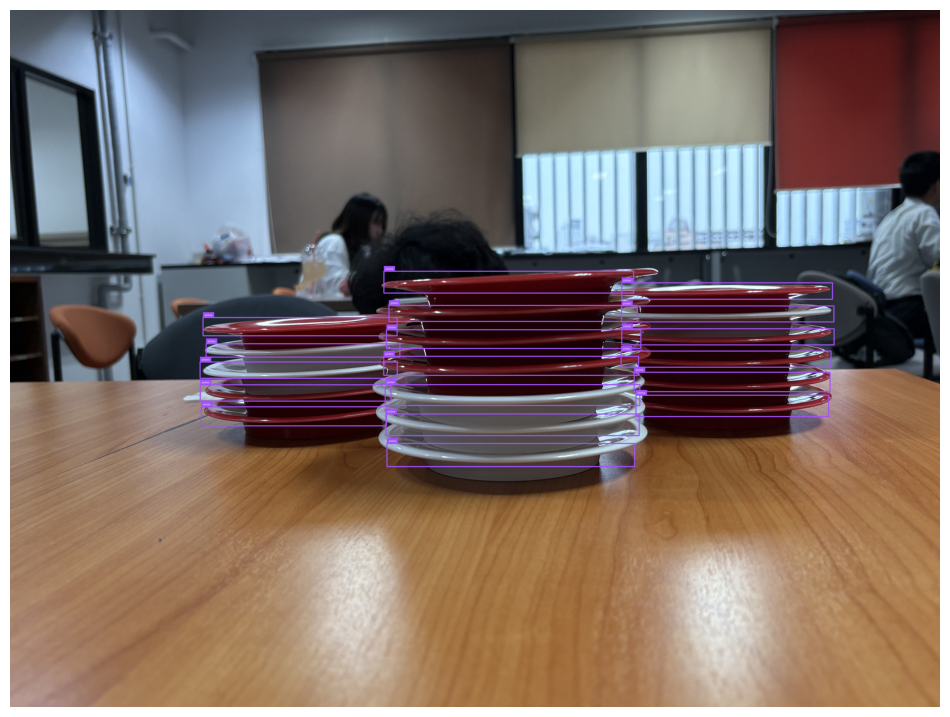

In [ ]:
image_path = "/content/IMG_2060.JPG"
result_count, result_image = process_image(image_path, model, sv)

🔍 Hue: 350.00, Saturation: 63.92%, Value: 26.27%
🔍 Hue: 354.00, Saturation: 91.76%, Value: 22.35%
🔍 Hue: 350.00, Saturation: 89.80%, Value: 21.18%
🔍 Hue: 200.00, Saturation: 20.39%, Value: 95.69%
Red: 3
White: 1
Number of detections: 4
Number of boxes drawn: 4


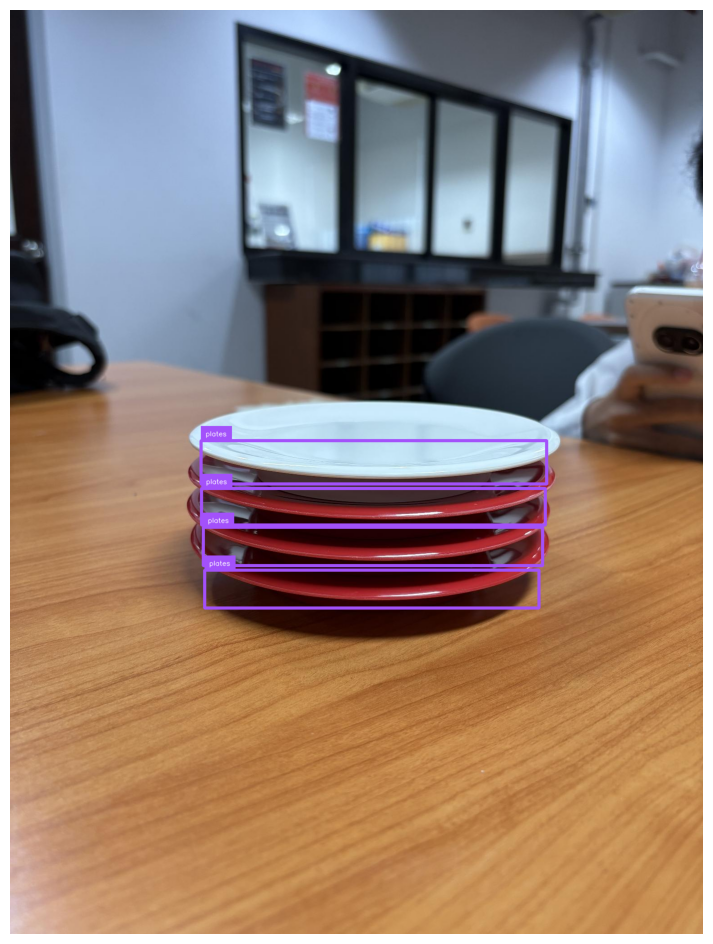

In [ ]:
i = random.randint(0, len(ds))

image_path, image, target = ds[i]

result_count, result_image = process_image(image_path, model, sv)

🔍 Hue: 338.00, Saturation: 80.78%, Value: 18.43%
🔍 Hue: 290.00, Saturation: 43.14%, Value: 35.69%
🔍 Hue: 342.00, Saturation: 89.41%, Value: 15.69%
🔍 Hue: 338.00, Saturation: 77.65%, Value: 18.82%
🔍 Hue: 340.00, Saturation: 87.45%, Value: 17.25%
🔍 Hue: 342.00, Saturation: 89.02%, Value: 15.69%
🔍 Hue: 340.00, Saturation: 82.35%, Value: 18.82%
🔍 Hue: 342.00, Saturation: 83.53%, Value: 17.65%
🔍 Hue: 342.00, Saturation: 84.31%, Value: 17.65%
🔍 Hue: 342.00, Saturation: 85.49%, Value: 16.47%
🔍 Hue: 342.00, Saturation: 83.14%, Value: 18.82%
🔍 Hue: 348.00, Saturation: 72.94%, Value: 27.06%
Black: 10
Red2: 1
Red: 1
Number of detections: 12
Number of boxes drawn: 12


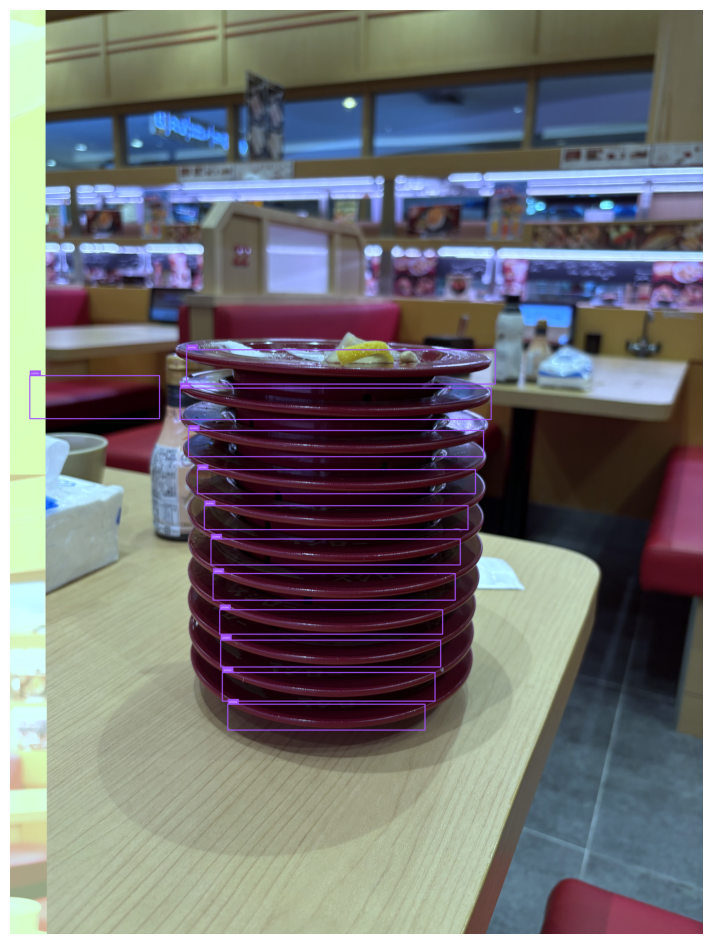

In [ ]:

def detect_color_from_bbox(image, bbox, crop_ratio=0.8):
    """
    Detect average color from bounding box using advanced color analysis

    Args:
    - image: PIL Image
    - bbox: (xmin, ymin, xmax, ymax)
    - crop_ratio: Ratio of bounding box to analyze (default 0.8)

    Returns:
    - Tuple of (hue, saturation, value)
    """
    xmin, ymin, xmax, ymax = bbox
    cropped_img = image.crop((xmin, ymin, xmax, ymax))
    cropped_img = np.array(cropped_img)

    # Convert to HSV
    hsv_img = cv2.cvtColor(cropped_img, cv2.COLOR_RGB2HSV)

    # Apply median blur to reduce noise
    hsv_img = cv2.medianBlur(hsv_img, 5)

    # Crop center of the image
    h, w, _ = hsv_img.shape
    new_h, new_w = int(h * crop_ratio), int(w * crop_ratio)
    y_offset, x_offset = (h - new_h) // 2, (w - new_w) // 2
    cropped_center = hsv_img[y_offset:y_offset+new_h, x_offset:x_offset+new_w]

    # Calculate median values
    avg_hue = np.median(cropped_center[:, :, 0])
    avg_sat = np.median(cropped_center[:, :, 1])
    avg_val = np.median(cropped_center[:, :, 2])

    return avg_hue, avg_sat, avg_val

def identify_color(avg_hue, avg_sat, avg_val):
    """
    Identify color based on HSV values

    Args:
    - avg_hue: Hue value (0-180 in OpenCV)
    - avg_sat: Saturation value (0-255)
    - avg_val: Value/Brightness value (0-255)

    Returns:
    - Color name as string
    """
    # Convert OpenCV HSV to standard HSV
    hue = avg_hue * 2  # OpenCV uses 0-180, standard HSV uses 0-360
    sat = avg_sat / 255 * 100  # Convert to percentage
    val = avg_val / 255 * 100  # Convert to percentage

    # Print debug information
    print(f"🔍 Hue: {hue:.2f}, Saturation: {sat:.2f}%, Value: {val:.2f}%")

    # Check for white, black, or gray conditions
    if val < 20:
        return "Black"
    if sat < 20 or val > 90:
        return "White"

    # Detailed color mapping
    if (hue >= 330 or hue <= 30):  # Red
        return "Red"
    elif 30 < hue < 90:  # Yellow to Green
        if hue < 60:
            return "Yellow"
        else:
            return "Green"
    elif 90 <= hue < 150:  # Cyan to Blue
        if hue < 120:
            return "Cyan"
        else:
            return "Blue"
    elif 150 <= hue < 270:  # Blue to Purple
        if hue < 210:
            return "Blue"
        else:
            return "Purple"
    elif 270 <= hue < 330:  # Magenta to Red
        return "Red2"

    return "Unknown"

# Main processing function
def process_image(image_path, model, sv):
    # Open and preprocess image
    image = Image.open(image_path)
    image = ImageOps.exif_transpose(image)
    image = image.convert("RGB")
    image = Image.fromarray(white_balance_gray_world(np.array(image)))
    # Transform image
    transform = transforms.Compose([
        transforms.Resize((640, 640)),
        transforms.ToTensor()
    ])
    image_tensor = transform(image).unsqueeze(0)

    # Detect objects
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results).with_nms()

    # Annotate image
    box_annotator = sv.BoxAnnotator(thickness=5)
    label_annotator = sv.LabelAnnotator()
    annotated_image = image.copy()
    annotated_image = box_annotator.annotate(scene=annotated_image, detections=detections)
    annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

    # Count colors
    dict_count = {}
    for i, box in enumerate(detections.xyxy):
        avg_color = detect_color_from_bbox(image, box)
        color = identify_color(*avg_color)

        # Count colors
        dict_count[color] = dict_count.get(color, 0) + 1

    # Print results
    for key, value in dict_count.items():
        print(f"{key}: {value}")

    print(f"Number of detections: {len(detections.xyxy)}")
    print(f"Number of boxes drawn: {len(detections)}")

    # Plot image
    sv.plot_image(annotated_image)

    return dict_count, annotated_image

# Call the processing function
result_count, result_image = process_image(image_path, model, sv)